## Project Setting

The purpose of this project is to predict wine quality rating based on exploration and analysis of wines from the Vinho Verde region of Portugal, on data from protected designation of origin wine samples collected from May 2004 to February 2007 and tested at the official Vinho Verde interprofessional certification entity (CVRVV).  

This will be done in Python, using different statistical tests, modelling and graphs.

## Executive Summary



## DATA ACQUISITION

- Data was originally obtained as two .cvs files (red wine, white wine) donated by the University of Minho, Portual, to UCI via Data.World.
- After combining the two .cvs files, the newly acquired dataframe represented 6497 rows and 13 columns.
- Each row represented a different red or white wine.
- Each column represented a different feature of the wine — the fixed acidity (g(tartaric acid)/ℓ), the volatile acidity  (g(_acetic acid_)/ℓ), the citric acid (g/ℓ), the residual sugar (g/ℓ), the chlorides (g(_sodium chloride_)/ℓ), the free sulphur dioxide (mg/ℓ), the total sulphur dioxide (mg/ℓ), the density (g/ℓ), the pH, the sulphates (g(_potassium sulphate_)/ℓ), the alcohol (% vol), the quality, the color.


## DATA PREPARATION

- To prepare the data, it was necessary to drop outliers and any unnecessary columns.
- The single categorical column was encoded, with a dummy variable being created. The dummy variable was then concatenated onto the prepared wine dataframe.
- There were no null values.
- Outliers, being a very small percentage in the overall dataset, were dropped according to the Inter Quartile Range (IQR).
- The chlorides column deemed irrelevant to this project and dropped. 
- Features specifically examined were 
    - (1) the relationship between free and total sulphur dioxide, 
    - (2) the levels of citric acid and residual sugar in the wine, 
    - (3) the density of the wine and 
    - (4) total residual sugar in and the density of the wine.
- These were analysed against the target variable of quality rating of the wine.

## Data Dictionary 

|Feature|              Definition|
| :------|:------|
|**fixed_acidity**|             - the acids naturally occuring in grapes (tartaric, malic, citric) or produced by 
| |yeast during fermentation (succinic)|
|**volatile_acidity**|          - measure of the wines gaseous (volatile) acids, the primary one being acetic 
| |                        acid, which is asociated with vinegar ; overall, pronounced volatile acidity 
| |                            is a negative characteristic|                              
|**citric_acid**|               - often added to post-fermentation wine to balance sugar levels and / or to 
| |                            create a sense of vibrancy |
|**rs**|                        - residual sugar : the amount of sugar remaining in the wine after fermentation|
|**chlorides**|                 - indication of the presence of sodium chloride (salinity) of a wine| 
|**free_s02**|                  - sulphur dioxide is an anti-oxidant (preservative) ; free sulphur dioxide is S02 
| |                                added to the wine that has not reacted with other chemical compounds in the 
| |                                wine ; too much added S02 will produce a sulphury smell in the wine|
|**total_s02**|                 - free and bound S02 ; bound S02 has combined with chemical compounds in the wine |
|**density**|                   - a description of the viscosity, related to alcohol, sugar, glycerol and other 
| |                                dissolved solids in the wine ;
| |                            - related to a wine's mouthfeel ; 
| |                            - specifically, 'the mass per unit volume of wine or must at 20°C. It is 
| |                             expressed in grams per milliliter, and denoted by the symbol ρ' (OIV) ; 
| |                            - alternately, a measurement of the sugar content of the grapes before fermentation
|**pH**|                        - a measure of the relative alkilinity vs the relative acidity of a wine ; usually 
| |                            between 3 and 4 pH ; typically, a wine with a high level of acidity will 
| |                            have a low pH level|
|**alcohol**|                   - percentage alcohol by volume in the finished wine|
|**quality (TARGET)**|          - rating / score between 0 and 10, with 10 being the best|

In [1]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import TweedieRegressor
from sklearn.linear_model import LassoLars

from scipy import stats
from scipy.stats import pearsonr, spearmanr

from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.cluster import KMeans

from sklearn.feature_selection import SelectKBest, f_regression, RFE


from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

from sklearn.neighbors import KNeighborsClassifier

# import my functions
import prepare
import env
import prepare_xy_split
import selectKBest_rfe_functions
import functions
import wrangle

# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")
seed = 23
%matplotlib inline


In [2]:
# wrangling dataset
wine = wrangle.gimme_wine()

quality column ignored
color column ignored


In [3]:
# checking work
wine.sample(5)

,fixed_acidity,volatile_acidity,citric_acid,rs,chlorides,free_s02,total_s02,density,pH,sulphates,alcohol,quality,color_white
972,6.8,0.22,0.35,17.5,0.039,38.0,153.0,0.99940,3.24,0.42,9.0,6,1
905,8.4,0.19,0.42,1.6,0.047,9.0,101.0,0.99400,3.06,0.65,11.1,4,1
355,7.3,0.22,0.37,14.3,0.063,48.0,191.0,0.99780,2.89,0.38,9.0,6,1
3682,6.4,0.16,0.44,1.2,0.051,39.0,122.0,0.99058,3.11,0.75,11.3,7,1
1748,8.0,0.27,0.24,1.2,0.044,20.0,102.0,0.99290,3.28,0.42,10.9,5,1


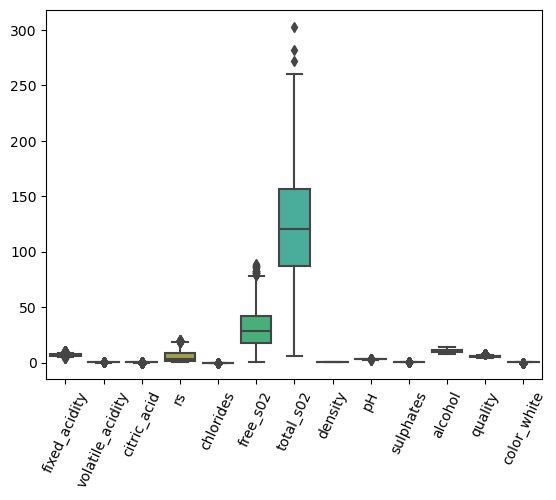

In [4]:
# looking for outliers

sns.boxplot(data = wine)
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
labels = wine.columns
plt.xticks(x, labels, rotation = 65)
plt.show()

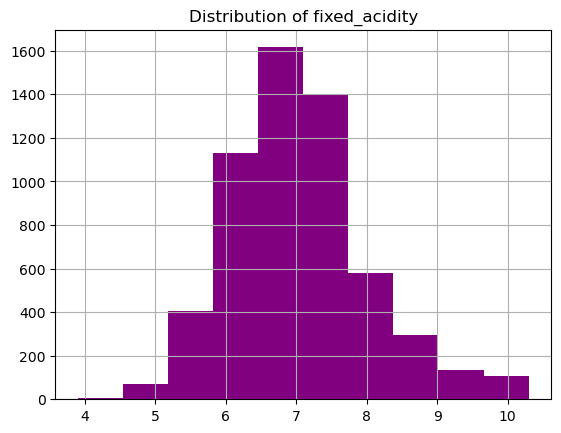

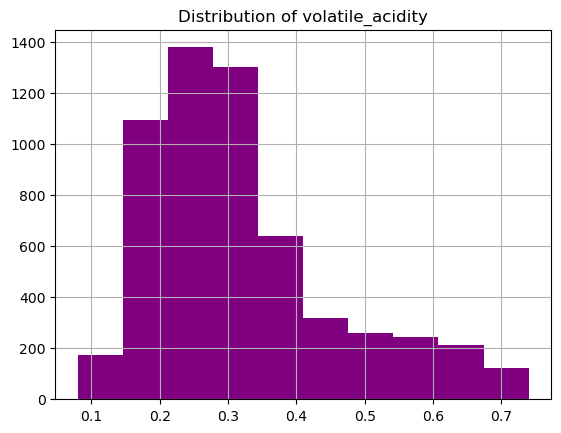

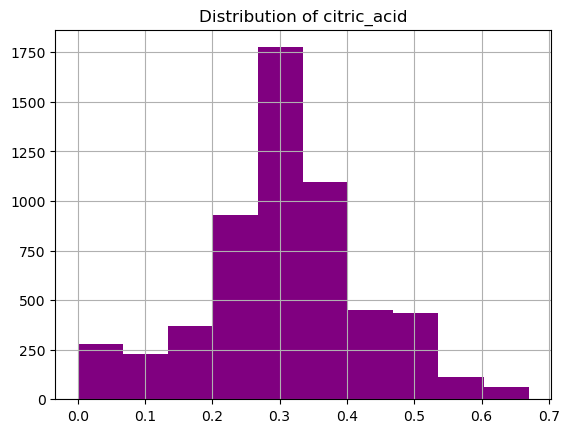

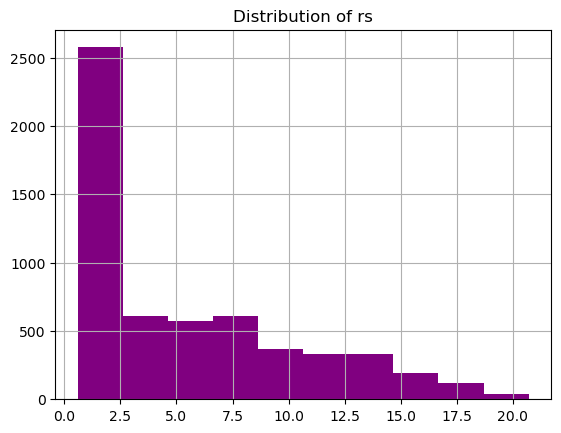

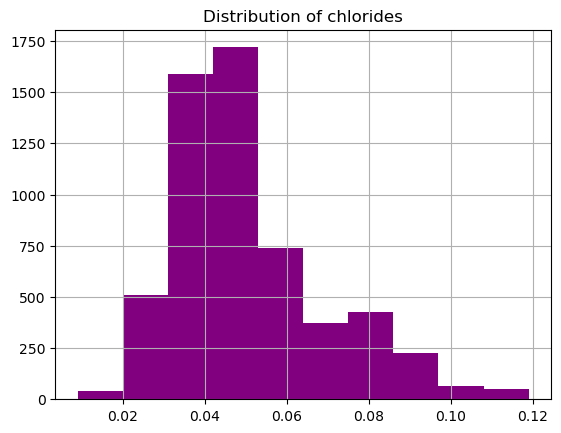

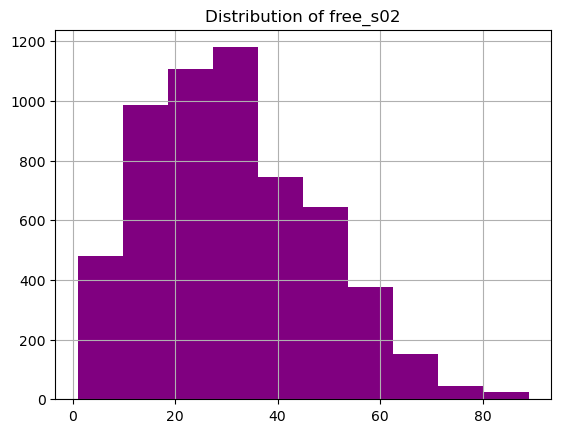

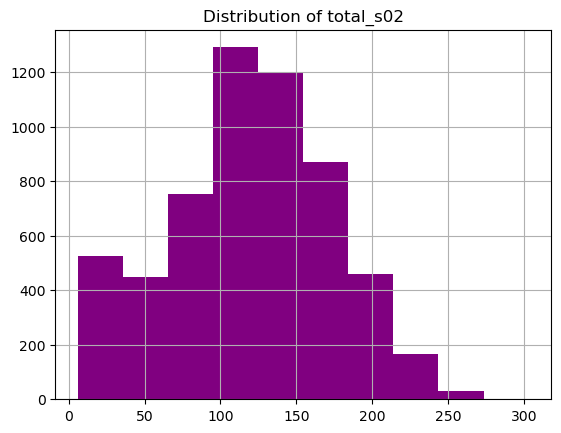

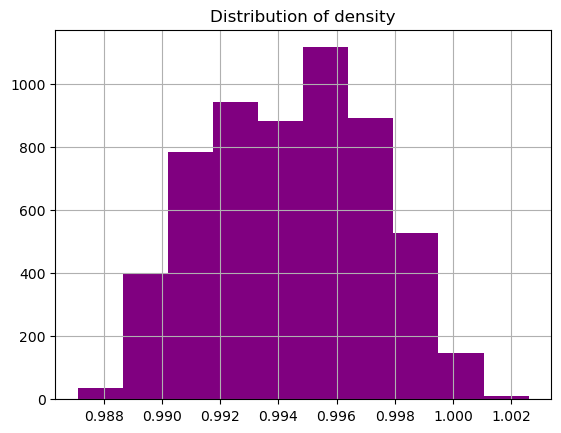

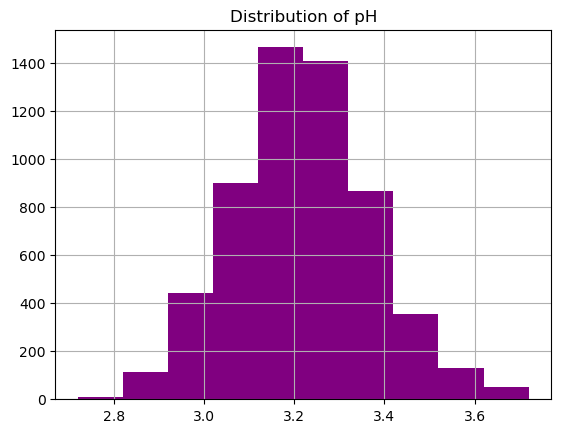

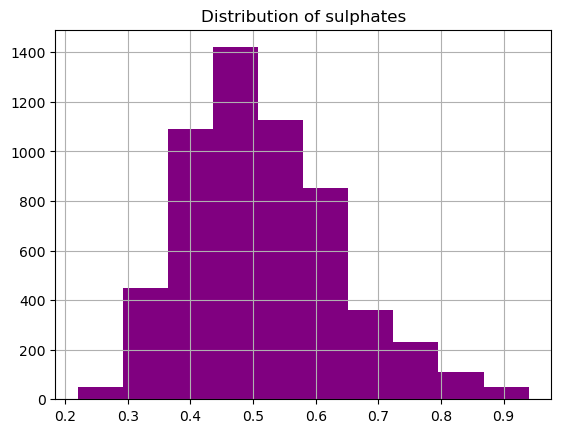

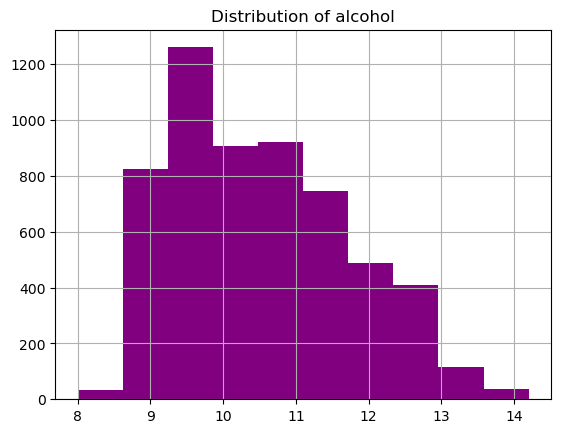

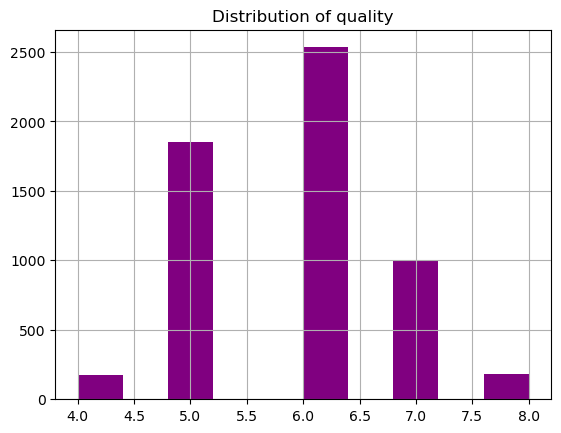

In [5]:
# plotting the distribution of numeric columns

functions.distributions(wine)

### Splitting the data into train, validate, test

In [6]:
# Calling function to split data
train, val, test = prepare.train_val_test(wine, 'quality')
train.shape, val.shape, test.shape

((4017, 13), (1033, 13), (689, 13))

In [7]:
# Getting correlation values
wine.corr()

,fixed_acidity,volatile_acidity,citric_acid,rs,chlorides,free_s02,total_s02,density,pH,sulphates,alcohol,quality,color_white
fixed_acidity,1.000000,0.184789,0.224927,-0.071021,0.357396,-0.216615,-0.224479,0.378508,-0.237732,0.182199,-0.120596,-0.097641,-0.393338
volatile_acidity,0.184789,1.000000,-0.438855,-0.188370,0.516304,-0.342204,-0.388926,0.224701,0.256112,0.213767,-0.033140,-0.230810,-0.646675
citric_acid,0.224927,-0.438855,1.000000,0.167138,-0.197575,0.199041,0.269549,0.025369,-0.282480,-0.035505,0.011051,0.090093,0.288709
rs,-0.071021,-0.188370,0.167138,1.000000,-0.108569,0.429072,0.498226,0.611893,-0.282931,-0.165980,-0.397263,-0.044747,0.330302
chlorides,0.357396,0.516304,-0.197575,-0.108569,1.000000,-0.260095,-0.341479,0.517553,0.240164,0.344114,-0.347254,-0.263200,-0.727149
free_s02,-0.216615,-0.342204,0.199041,0.429072,-0.260095,1.000000,0.711680,0.116603,-0.168395,-0.148631,-0.195179,0.067856,0.443179
total_s02,-0.224479,-0.388926,0.269549,0.498226,-0.341479,0.711680,1.000000,0.142080,-0.259219,-0.233621,-0.298677,-0.054430,0.666498
density,0.378508,0.224701,0.025369,0.611893,0.517553,0.116603,0.142080,1.000000,0.050104,0.213899,-0.756523,-0.325071,-0.326935
pH,-0.237732,0.256112,-0.282480,-0.282931,0.240164,-0.168395,-0.259219,0.050104,1.000000,0.306233,0.087432,0.027356,-0.381883
sulphates,0.182199,0.213767,-0.035505,-0.165980,0.344114,-0.148631,-0.233621,0.213899,0.306233,1.000000,0.004344,0.046815,-0.453758


### Scaling the data

In [8]:
# Scaling the data
scaler, train_scaled, val_scaled, test_scaled = prepare.scale_splits_rb(train, 
                                                                        val, 
                                                                        test, 
                                                                        return_scaler = True)  

In [9]:
# Creating variables to scale
X_train, y_train, X_val, y_val, X_test, y_test = functions.tts_xy(train_scaled, 
                                                                  val_scaled, test_scaled, 'quality')


In [10]:
# Adding cluster columns to validate and test dfs
X_train, val_scaled, X_val, test_scaled, X_test = functions.add_cols(X_train, val_scaled, X_val, test_scaled, X_test)

# ----------------------***EXPLORATION***----------------------


* Does density have an affect on the quality of wine?
* How does Sugar and Citric Acid affect the quality of wine? 
* Is the quality of wine effected by the amount of sulphites?
* Do sugar and density affect a wine's quality? 

### Question 1 Hypothesis:
* H_0 : The density of the wine has no relationship to its quality.
* H_a : The density of the wine has a relationship to its quality.

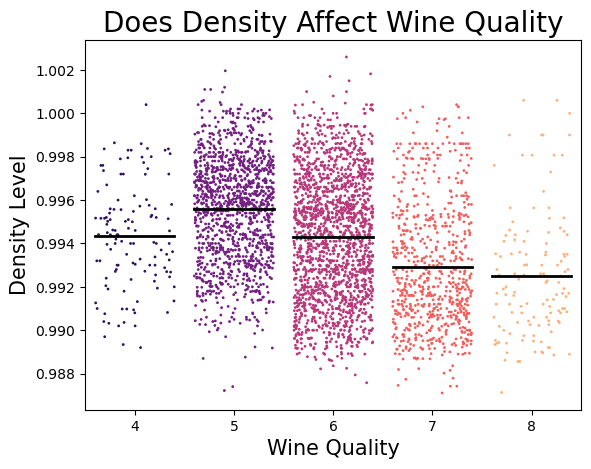

In [11]:
# Calling function to show density v. quality
functions.density_quality(train)

> ## ***Takeaway:*** The lower the density, the better the wine

In [12]:
# Calling function to run T-test
results1 = functions.t_test(train.quality, train.density)

362.8630437322157 0.0

We reject the null hypothesis as there is a
significant relationship between density and quality of wine.


># Clustering 

### Question 2 Hypothesis:
* H_0 : The levels of sugar and citric acid in the wine are independent of its quality.
* H_a : The levels of sugar and citric acid in the wine are dependent to its quality.

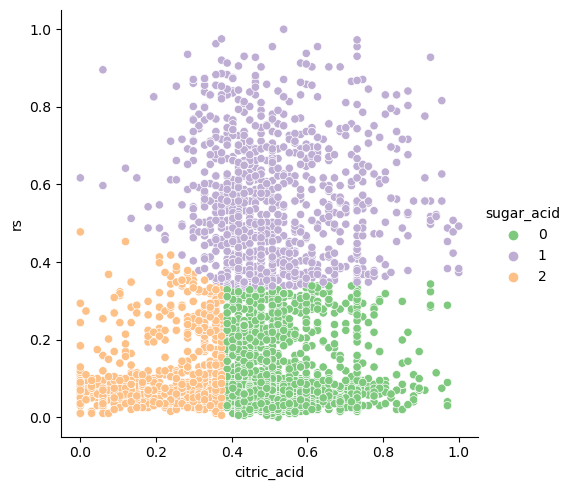

In [13]:
# Calling function to cluster residual sugar and citric acid
functions.cluster_sugar_acid(train_scaled)

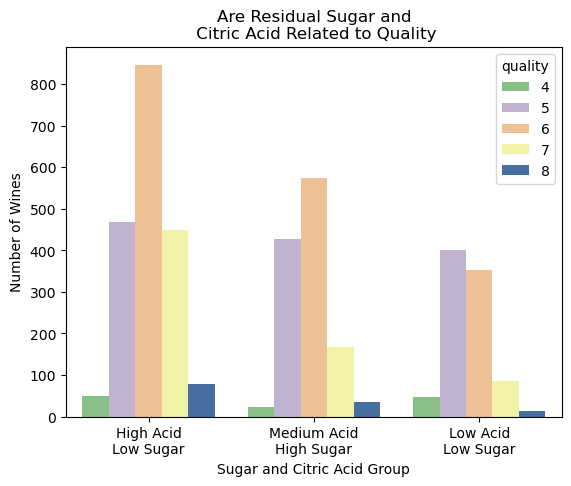

In [14]:
#plotting Sugar and Citric Acid clusters against quality
functions.sugar_acid_compare(train_scaled)

> ## ***Takeaway:*** High Acid and low sugar tends to have a higher quality wines

In [15]:
# Calling function to run Chi^2 test
sugar_acid_result = functions.chi_sq(train_scaled.quality, train_scaled.sugar_acid)

chi^2  = 203.9950
p-value = 0.0000


### Question 3 Hypothesis:
* H_0 : The overall quality of the wine has no relationship to the amount of sulphides present.
* H_a : The overall quality of the wine has a relationship to the amount of sulphides present.

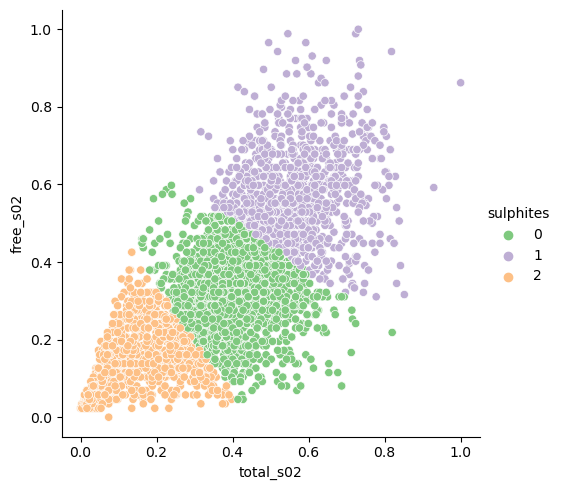

In [16]:
# Calling function to cluster free and total S02
functions.cluster_sulphites(train_scaled)

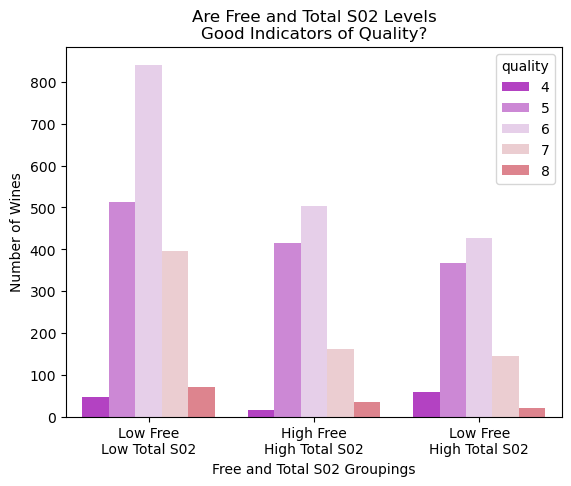

In [17]:
#plotting Free and Total S02 feature against quality
functions.sulphites_compare(train_scaled)

In [18]:
# Calling function to run Chi^2 test
sulphites_result = functions.chi_sq(train_scaled.quality, train_scaled.sulphites)

chi^2  = 97.6935
p-value = 0.0000


### Question 4 Hypothesis:
* H_0 : The total residual sugar in and the density of the wine have no relationship to its quality.
* H_a : The total residual sugar in and the density of the wine have a relationship to its quality.

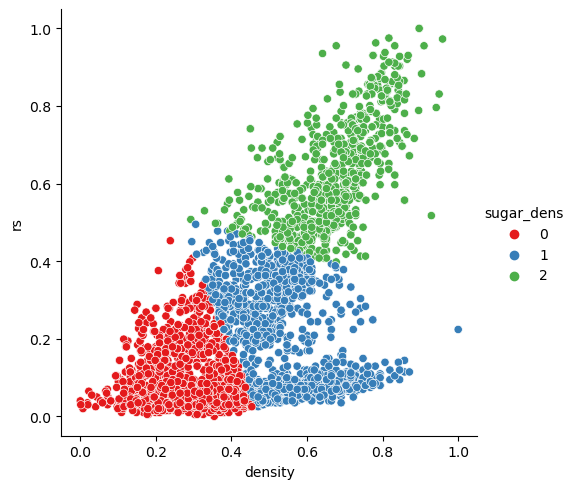

In [19]:
# Calling function to cluster residual sugar and density
functions.cluster_sug_dens(train_scaled)

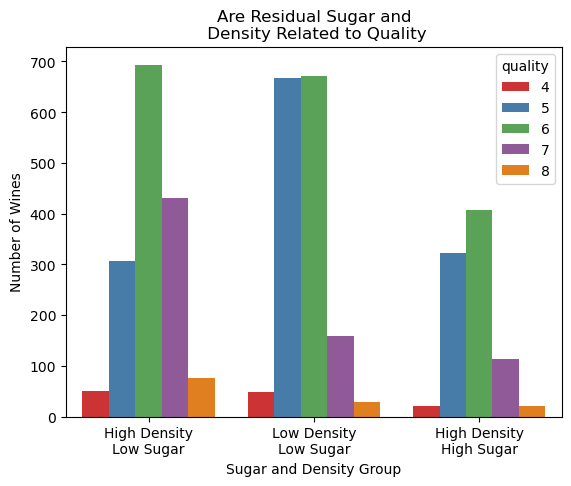

In [20]:
#plotting residual sugar and density feature against quality
functions.sugar_dens_compare(train_scaled)

In [21]:
# Calling function to run Chi^2 test
sugar_density_result = functions.chi_sq(train_scaled.quality, train_scaled.sugar_dens)

chi^2  = 312.2628
p-value = 0.0000


## Exploration Summary
* 
* 
*  
* 

&nbsp;

# ----------------------***MODELING***----------------------

* Based on our exploration results, we moved to modeling with density and sugar_acid as our main features

&nbsp;

## OLS/Linear Regression

In [22]:
# Calling function to run model on train
functions.quality_ols(train_scaled, 'density')

The RMSE on the baseline against wine quality is 0.8488.
The RMSE for the OLS Linear Regression model was 0.8064.


In [23]:
# Calling function to run model on train
functions.quality_ols(train_scaled, 'sugar_acid')

The RMSE on the baseline against wine quality is 0.8488.
The RMSE for the OLS Linear Regression model was 0.8304.


In [24]:
# Calling function to run model on validate
functions.quality_ols(val_scaled, 'density')

The RMSE on the baseline against wine quality is 0.8379.
The RMSE for the OLS Linear Regression model was 0.7873.


In [25]:
# Calling function to run model on validate
functions.quality_ols(val_scaled, 'sugar_acid')

The RMSE on the baseline against wine quality is 0.8379.
The RMSE for the OLS Linear Regression model was 0.81.


## Tweedie Regressor

In [26]:
functions.tweedie_density(train_scaled, X_train, y_train)

The RMSE for the Tweedie Regressor model was 0.8461.
The RMSE on the baseline of density against wine quality is 0.8488.


In [27]:
functions.tweedie_sugar_acid(train_scaled, X_train, y_train)

The RMSE for the Tweedie Regressor model was 0.8373.
The RMSE on the baseline of sugar & citric acid against wine quality is 0.8488.


In [28]:
functions.tweedie_density(val_scaled, X_val, y_val)

The RMSE for the Tweedie Regressor model was 0.8348.
The RMSE on the baseline of density against wine quality is 0.8379.


In [29]:
functions.tweedie_sugar_acid(val_scaled, X_val, y_val)

The RMSE for the Tweedie Regressor model was 0.8208.
The RMSE on the baseline of sugar & citric acid against wine quality is 0.8379.


**CLASSIFICATION TAKEAWAYS :**

**The Random Forest model with 11 branches had an accuracy rate of 83.5pc. The accuracy of the Decision Tree  with 11 branches was about 81.4pc. With an accuracy that is 2.1pc better than the Decision Tree model, the Random Forest wins out in the Classification modelling.**

**Both models are more accurate than the baseline prediction, with the Random Forest model at 11 branches, at an accuracy of 83.5pc, being 39.36pc more accurate than the baseline prediction of 44.14pc.**

&nbsp;